## <u>IBM Attrition Prediction</u>

#### <u> BUSINESS PROBLEM </u>
“Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.”

Our role is to uncover the factors that lead to employee attrition through Exploratory Data Analysis, and explore them by using various classification models to predict if an employee is likely to quit. This could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition.

While this model can be routinely run to identify employees, who are most likely to quit, the key driver of success would be the human element of reaching out the employee, understanding the current situation of the employee and taking action to remedy controllable factors that can prevent attrition of the employee.

<u>HR ANALYTICS</u>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

<u>DATASET</u>

This is a hypothetical dataset created by IBM data scientists. The dataset has (23436R X 37C) that contains numeric and categorical data types describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. Machine Learning models can help to understand and determine how these factors relate to workforce attrition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None) # To display maximum columns

In [2]:
IBM_df =pd.read_csv(r'IBM_Data_new.csv')
IBM_testing=pd.read_csv(r'IBM_testing.csv')


In [3]:
IBM_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1,19344,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,Y,No,20,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0
23432,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1,19345,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1,16794,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,4.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1,1956,3.0,Female,45,2.0,3.0,Manager,1,Single,11631,5615.0,2.0,Y,No,12,3.0,4.0,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0


In [4]:
IBM_testing

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
IBM_df.shape

(23436, 35)

In [6]:
IBM_testing.shape

(1470, 35)

In [7]:
#Creating copy of original dataframe

In [8]:
ibm_df = IBM_df

In [9]:
ibm_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1,19344,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Single,10883,20467.0,3.0,Y,No,20,4.0,3.0,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0
23432,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1,19345,3.0,Male,92,1.0,3.0,Healthcare Representative,4,Divorced,10883,20467.0,0.0,Y,No,20,4.0,3.0,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1,16794,4.0,Male,83,3.0,2.0,Sales Executive,3,Married,5301,2939.0,4.0,Y,No,15,3.0,3.0,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1,1956,3.0,Female,45,2.0,3.0,Manager,1,Single,11631,5615.0,2.0,Y,No,12,3.0,4.0,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0


In [10]:
ibm_df.shape

(23436, 35)

In [11]:
# Description of Datframes

In [12]:
ibm_df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [13]:
IBM_testing.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
#lets check is their any unique values present in the variables .

In [15]:
for i in ibm_df.columns:
    if ibm_df[i].dtype == 'object' or ibm_df[i].dtype == 'float64':
        print('--------- {} -----------'.format(i))
        print(ibm_df[i].unique())
        print('\nCount ::',ibm_df[i].nunique(),'\n')

--------- Age -----------
[41. 37. 18. 34. 24. 39. 30. 31. 20. 26. 25. 28. 36. 29. 27. 32. 50. 48.
 53. 56. 51. 46. 19. 35. 33. 58. 47. 44. 21. 45. 38. 23. 22. 40. 52. 42.
 49. 55. 43. 59. 54. 57. 60. nan]

Count :: 43 

--------- Attrition -----------
['Voluntary Resignation' 'Current employee' nan]

Count :: 2 

--------- BusinessTravel -----------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]

Count :: 3 

--------- DailyRate -----------
[1102. 1360. 1356. 1085.  143.  906.  427.  334.  314.  167.  552.  802.
  857.  933.  465.  896. 1411.  247.  267. 1276.  483.  645. 1200.  509.
 1206.  548.  447.  642.  582.  930.  263.  840.  549. 1018.  918.  796.
  337.  256. 1283.  807. 1373.  504.  625. 1141.  370. 1040.  889.  558.
  408. 1115.  397. 1189.  290. 1372.   nan 1107. 1305.  446.  663.  319.
 1225. 1017.  571.  228.  728. 1192.  309. 1319.  921.  977. 1063. 1439.
  799.  142.  482.  671.  161.  342. 1231. 1252.  124.  589.  367. 1462.
 1413.  674. 1470. 1278.  783. 1239

- we can see unique values in some variables we need to handle them
- we need to 

In [16]:
# outlier detection

In [17]:
#We can See some Outliers are present in the data.


In [18]:
# NumCompaniesWorked
# Here we can see NumCompaniesWorked is 23258 and 4933.
# if some one Lives Entire life Working No one can work at this much companies. 
# We can Replace them Max 10 companies 

In [19]:
ibm_df.loc[(ibm_df.NumCompaniesWorked>10)] 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0


In [20]:
# Here performance Rating Cant be greater than 5 hence we will also cap them with max value.

In [21]:
ibm_df.loc[(ibm_df.PerformanceRating>5),'PerformanceRating']

15655    11.0
17027    13.0
Name: PerformanceRating, dtype: float64

In [22]:
ibm_df.loc[(ibm_df.JobInvolvement > ibm_df.JobInvolvement.quantile(0.9))]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
102,41.0,Current employee,Travel_Rarely,427.0,Human Resources,10,4.0,Human Resources,1,118,1.0,Female,37,4.0,1.0,Laboratory Technician,1,Married,2670,9964.0,4.0,Y,Yes,20,3.0,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
103,41.0,Current employee,Travel_Rarely,427.0,Human Resources,10,4.0,Medical,1,120,1.0,Female,37,4.0,1.0,Laboratory Technician,1,Married,2670,9964.0,1.0,Y,Yes,20,3.0,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
104,41.0,Current employee,Travel_Rarely,427.0,Human Resources,10,4.0,Human Resources,1,121,1.0,Female,37,4.0,1.0,Laboratory Technician,1,Married,2670,9964.0,4.0,Y,Yes,20,4.0,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
105,41.0,Current employee,Travel_Rarely,427.0,Human Resources,10,4.0,Medical,1,122,1.0,Female,37,4.0,1.0,Laboratory Technician,1,Married,2670,9964.0,1.0,Y,Yes,20,4.0,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
106,41.0,Current employee,Travel_Rarely,427.0,Human Resources,10,4.0,Human Resources,1,131,1.0,Female,37,4.0,1.0,Laboratory Technician,1,Married,2670,9964.0,4.0,Y,Yes,20,3.0,1.0,80.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,60.0,Current employee,Travel_Rarely,696.0,Sales,7.0,4.0,Marketing,1,14094,2.0,Male,52,4.0,2.0,Sales Executive,4,Married,5220,10893.0,5.0,Y,Yes,18,3.0,2.0,80.0,1.0,12.0,3.0,3.0,11.0,7.0,1.0,9.0
23413,60.0,Current employee,Travel_Rarely,696.0,Sales,7.0,4.0,Marketing,1,14095,2.0,Male,52,4.0,2.0,Sales Executive,4,Divorced,5220,10893.0,0.0,Y,Yes,18,3.0,2.0,80.0,1.0,12.0,3.0,3.0,11.0,7.0,1.0,9.0
23414,60.0,Current employee,Travel_Rarely,696.0,Sales,7.0,4.0,Marketing,1,14098,2.0,Male,52,4.0,2.0,Sales Executive,4,Divorced,5220,10893.0,5.0,Y,Yes,18,3.0,2.0,80.0,1.0,12.0,3.0,3.0,11.0,7.0,1.0,9.0
23415,60.0,Current employee,Travel_Rarely,696.0,Sales,7.0,4.0,Marketing,1,14101,2.0,Male,52,4.0,2.0,Sales Executive,4,Married,5220,10893.0,0.0,Y,Yes,18,3.0,2.0,80.0,1.0,16.0,3.0,2.0,14.0,8.0,6.0,9.0


In [23]:
ibm_df.loc[(ibm_df.EnvironmentSatisfaction>ibm_df.EnvironmentSatisfaction.quantile(0.9))]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17.0,3.0,Medical,1,NaN,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0


In [24]:
#Removal of Outliers

In [25]:
global y
y = ibm_df.NumCompaniesWorked.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
ibm_df.NumCompaniesWorked=ibm_df.NumCompaniesWorked.apply(capping)
ibm_df.NumCompaniesWorked.value_counts()

1.0    8311
0.0    3176
7.0    2784
3.0    2508
2.0    2330
4.0    2208
6.0    1108
5.0    1002
Name: NumCompaniesWorked, dtype: int64

In [26]:
ibm_df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,2.581338,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,2.270676,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,7.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [27]:
global y
y = ibm_df.EnvironmentSatisfaction.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
ibm_df.EnvironmentSatisfaction=ibm_df.EnvironmentSatisfaction.apply(capping)
ibm_df.EnvironmentSatisfaction.value_counts()

3.0    7196
4.0    7112
1.0    4580
2.0    4539
Name: EnvironmentSatisfaction, dtype: int64

In [28]:
global y
y = ibm_df.PerformanceRating.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
ibm_df.PerformanceRating=ibm_df.PerformanceRating.apply(capping)
ibm_df.PerformanceRating.value_counts()

3.0    19791
4.0     3635
Name: PerformanceRating, dtype: int64

In [29]:
global y
y = ibm_df.JobInvolvement.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
ibm_df.JobInvolvement=ibm_df.JobInvolvement.apply(capping)
ibm_df.JobInvolvement.value_counts()

3.0    16135
2.0     5973
1.0     1319
Name: JobInvolvement, dtype: int64

In [30]:
ibm_df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,2.718829,2.632433,2.064023,14304.343821,2.581338,3.155169,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1.095596,0.587436,1.105421,7102.636293,2.270676,0.362074,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,4.000000,3.000000,5.000000,26999.000000,7.000000,4.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [31]:
ibm_df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [32]:
IBM_testing.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [33]:
for i in ibm_df.columns:
    if ibm_df[i].dtype == 'object' or ibm_df[i].dtype == 'float64':
        print('--------- {} -----------'.format(i))
        print(ibm_df[i].unique())
        print('\nCount ::',ibm_df[i].nunique(),'\n')

--------- Age -----------
[41. 37. 18. 34. 24. 39. 30. 31. 20. 26. 25. 28. 36. 29. 27. 32. 50. 48.
 53. 56. 51. 46. 19. 35. 33. 58. 47. 44. 21. 45. 38. 23. 22. 40. 52. 42.
 49. 55. 43. 59. 54. 57. 60. nan]

Count :: 43 

--------- Attrition -----------
['Voluntary Resignation' 'Current employee' nan]

Count :: 2 

--------- BusinessTravel -----------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]

Count :: 3 

--------- DailyRate -----------
[1102. 1360. 1356. 1085.  143.  906.  427.  334.  314.  167.  552.  802.
  857.  933.  465.  896. 1411.  247.  267. 1276.  483.  645. 1200.  509.
 1206.  548.  447.  642.  582.  930.  263.  840.  549. 1018.  918.  796.
  337.  256. 1283.  807. 1373.  504.  625. 1141.  370. 1040.  889.  558.
  408. 1115.  397. 1189.  290. 1372.   nan 1107. 1305.  446.  663.  319.
 1225. 1017.  571.  228.  728. 1192.  309. 1319.  921.  977. 1063. 1439.
  799.  142.  482.  671.  161.  342. 1231. 1252.  124.  589.  367. 1462.
 1413.  674. 1470. 1278.  783. 1239

In [34]:
for i in IBM_testing.columns:
    if IBM_testing[i].dtype == 'object' or IBM_testing[i].dtype == 'int64':
        print('--------- {} -----------'.format(i))
        print(IBM_testing[i].unique())
        print('\nCount ::',IBM_testing[i].nunique(),'\n')

--------- Age -----------
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Count :: 43 

--------- Attrition -----------
['Yes' 'No']

Count :: 2 

--------- BusinessTravel -----------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Count :: 3 

--------- DailyRate -----------
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147 

In [35]:
# handling the unique values

<u> Department </u>

In [36]:
ibm_df['Department'].unique()

# # in department we have '1296' value which we need to replace with the mode value of department variable.

array(['Sales', 'Research & Development', 'Human Resources', nan, '1296'],
      dtype=object)

In [37]:
ibm_df['Department'].mode()[0]


'Research & Development'

In [38]:
#we replace mode value with '1296'

ibm_df['Department']=ibm_df['Department'].replace('1296', 'Research & Development')

In [39]:
ibm_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources', nan],
      dtype=object)

<u> DistanceFromHome </u>

In [40]:
ibm_df['DistanceFromHome'].unique()

array(['1', '12', '20', '2', '4', '5', '22', '3', '10', '9', '14', '6',
       '19', '7', '23', '28', '8', '18', '11', '21', '25', '16', '13',
       '24', '27', '15', '26', '29', '17', nan, 'Research & Development',
       21.0, 5.0, 10.0, 9.0, 23.0, 1.0, 2.0, 15.0, 29.0, 27.0, 3.0, 4.0,
       26.0, 14.0, 16.0, 22.0, 18.0, 6.0, 12.0, 25.0, 24.0, 20.0, 7.0,
       8.0, 17.0, 28.0, 11.0, 19.0, 13.0], dtype=object)

In [41]:
ibm_df['DistanceFromHome'].mode()[0]

'1'

In [42]:
ibm_df['DistanceFromHome']=ibm_df['DistanceFromHome'].replace('Research & Development','1')

In [43]:
ibm_df['DistanceFromHome'].unique()

array(['1', '12', '20', '2', '4', '5', '22', '3', '10', '9', '14', '6',
       '19', '7', '23', '28', '8', '18', '11', '21', '25', '16', '13',
       '24', '27', '15', '26', '29', '17', nan, 21.0, 5.0, 10.0, 9.0,
       23.0, 1.0, 2.0, 15.0, 29.0, 27.0, 3.0, 4.0, 26.0, 14.0, 16.0, 22.0,
       18.0, 6.0, 12.0, 25.0, 24.0, 20.0, 7.0, 8.0, 17.0, 28.0, 11.0,
       19.0, 13.0], dtype=object)

In [44]:
#convert interger values which are in string to float values
ibm_df['DistanceFromHome']=ibm_df['DistanceFromHome'].astype('float')


In [45]:
ibm_df['DistanceFromHome'].unique()

array([ 1., 12., 20.,  2.,  4.,  5., 22.,  3., 10.,  9., 14.,  6., 19.,
        7., 23., 28.,  8., 18., 11., 21., 25., 16., 13., 24., 27., 15.,
       26., 29., 17., nan])

In [46]:
ibm_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1,1,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1,7,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0


<u> EducationField </u>

In [47]:
ibm_df['EducationField'].unique()

array(['Life Sciences', 'Technical Degree', 'Medical', 'Marketing',
       'Other', 'Human Resources', nan, '3', 'Test'], dtype=object)

In [48]:
ibm_df['EducationField'].mode()[0]

'Life Sciences'

In [49]:
ibm_df['EducationField']=ibm_df['EducationField'].replace(['3'],'Life Sciences')
ibm_df['EducationField']=ibm_df['EducationField'].replace(['Test'],'Other')

In [50]:
ibm_df['EducationField'].unique()

array(['Life Sciences', 'Technical Degree', 'Medical', 'Marketing',
       'Other', 'Human Resources', nan], dtype=object)

<u>EmployeeCount</u>

In [51]:
ibm_df['EmployeeCount'].unique()

array(['1', nan, 'Marketing', 1], dtype=object)

In [52]:
ibm_df['EmployeeCount'].mode()[0]


'1'

In [53]:
ibm_df['EmployeeCount']=ibm_df['EmployeeCount'].replace('Marketing','1')


In [54]:
ibm_df['EmployeeCount'].unique()


array(['1', nan, 1], dtype=object)

In [55]:
#convert interger values which are in string to float values
ibm_df['EmployeeCount']=ibm_df['EmployeeCount'].astype('float')


In [56]:
ibm_df['EmployeeCount'].unique()

array([ 1., nan])

<u> EmployeeNumber </u> 

In [57]:
ibm_df['EmployeeNumber'].unique()

#employee number has 17388 unique values

array(['1', '7', '8', ..., '16794', '1956', '17587'], dtype=object)

In [58]:
ibm_df['EmployeeNumber'].mode()[0]


'1'

In [59]:
ibm_df['EmployeeNumber']=ibm_df['EmployeeNumber'].replace('TEST','1')
ibm_df['EmployeeNumber']=ibm_df['EmployeeNumber'].replace('TESTING','1')
ibm_df['EmployeeNumber']=ibm_df['EmployeeNumber'].replace('Test','1')

In [60]:
ibm_df['EmployeeNumber']=ibm_df['EmployeeNumber'].astype('float')

<u>Gender</u>

In [61]:
ibm_df['Gender'].unique()

array(['Female', 'Male', nan, '1', '2'], dtype=object)

In [62]:
ibm_df['Gender'].mode()[0]

'Male'

In [63]:
ibm_df['Gender']=ibm_df['Gender'].replace(['1','2'],'Male')

In [64]:
ibm_df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

<u>HourlyRate</u>

In [65]:
ibm_df['HourlyRate'].unique()

array(['94', '33', '41', '39', '49', '70', '50', '56', '54', '66', '57',
       '65', '82', '95', '87', '37', '81', '80', '38', '42', '43', '96',
       '91', '44', '45', '46', '75', '36', '88', '52', '53', '62', '60',
       '73', '59', '61', '64', '55', '71', '72', '77', '32', '40', '90',
       '84', '85', '76', '35', '93', '31', '98', '34', '92', '63', '51',
       '89', '58', '30', '100', '47', '83', '48', '69', '67', '68', nan,
       '74', '78', '79', '86', '97', '99', 'Male', 'Female'], dtype=object)

In [66]:
ibm_df['HourlyRate'].mode()[0]

'66'

In [67]:
ibm_df['HourlyRate']=ibm_df['HourlyRate'].replace(['Male', 'Female'],'66')

In [68]:
ibm_df['HourlyRate'].unique()

array(['94', '33', '41', '39', '49', '70', '50', '56', '54', '66', '57',
       '65', '82', '95', '87', '37', '81', '80', '38', '42', '43', '96',
       '91', '44', '45', '46', '75', '36', '88', '52', '53', '62', '60',
       '73', '59', '61', '64', '55', '71', '72', '77', '32', '40', '90',
       '84', '85', '76', '35', '93', '31', '98', '34', '92', '63', '51',
       '89', '58', '30', '100', '47', '83', '48', '69', '67', '68', nan,
       '74', '78', '79', '86', '97', '99'], dtype=object)

In [69]:
ibm_df['HourlyRate']=ibm_df['HourlyRate'].astype('float')

<u>JobRole</u>

In [70]:
ibm_df['JobRole'].unique()

array(['Sales Executive', 'Manager', 'Research Director',
       'Sales Representative', 'Laboratory Technician',
       'Research Scientist', 'Manufacturing Director',
       'Healthcare Representative', 'Human Resources', nan, '5', '4'],
      dtype=object)

In [71]:
ibm_df['JobRole'].mode()[0]


'Sales Executive'

In [72]:
ibm_df['JobRole']=ibm_df['JobRole'].replace(['5', '4'],'Sales Executive')

In [73]:
ibm_df['JobRole'].unique()

array(['Sales Executive', 'Manager', 'Research Director',
       'Sales Representative', 'Laboratory Technician',
       'Research Scientist', 'Manufacturing Director',
       'Healthcare Representative', 'Human Resources', nan], dtype=object)

<u>JobSatisfaction</u>

In [74]:
ibm_df['JobSatisfaction'].unique()

array(['4', '3', '1', '2', nan, 'Manager'], dtype=object)

In [75]:
ibm_df['JobSatisfaction'].mode()[0]

'4'

In [76]:
ibm_df['JobSatisfaction']=ibm_df['JobSatisfaction'].replace(['Manager'],'4')

In [77]:
ibm_df['JobSatisfaction'].unique()

array(['4', '3', '1', '2', nan], dtype=object)

In [78]:
ibm_df['JobSatisfaction']=ibm_df['JobSatisfaction'].astype('float')

In [79]:
ibm_df['JobSatisfaction'].unique()

array([ 4.,  3.,  1.,  2., nan])

<u>MaritalStatus</u>

In [80]:
ibm_df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', nan, '4'], dtype=object)

In [81]:
ibm_df['MaritalStatus'].mode()[0]

'Married'

In [82]:
ibm_df['MaritalStatus']=ibm_df['MaritalStatus'].replace('4','Married')

In [83]:
ibm_df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

<u>MonthlyIncome </u>

In [84]:
ibm_df['MonthlyIncome'].unique()

array(['5993', '14756', '19566', ..., '3537', '14336', '13549'],
      dtype=object)

In [85]:
ibm_df['MonthlyIncome'].mode()[0]

'2342'

In [86]:
ibm_df['MonthlyIncome']=ibm_df['MonthlyIncome'].replace(['Married','Single'],'2342')

In [87]:
ibm_df['MonthlyIncome']=ibm_df['MonthlyIncome'].astype('float')

In [88]:
ibm_df['MonthlyIncome'].unique()

array([ 5993., 14756., 19566., ...,  3537., 14336., 13549.])

<u>Over18</u>

In [89]:
ibm_df['Over18'].unique()

array(['Y', nan, '1'], dtype=object)

In [90]:
ibm_df['Over18'].mode()[0]

'Y'

In [91]:
ibm_df['Over18']=ibm_df['Over18'].replace('1','Y')

In [92]:
ibm_df['Over18'].unique()

array(['Y', nan], dtype=object)

<u>OverTime</u>

In [93]:
ibm_df['OverTime'].unique()

array(['Yes', 'No', nan, 'Y'], dtype=object)

In [94]:
ibm_df['OverTime']=ibm_df['OverTime'].replace('Y','Yes')

In [95]:
ibm_df['OverTime'].unique()

array(['Yes', 'No', nan], dtype=object)

<u>PercentSalaryHike</u>

In [96]:
ibm_df['PercentSalaryHike'].unique()

array(['11', '14', '12', '22', '18', '13', '17', '23', '20', '19', '16',
       '15', '21', '24', '25', nan, 'No', 'Yes'], dtype=object)

In [97]:
ibm_df['PercentSalaryHike'].mode()[0]

'11'

In [98]:
ibm_df['PercentSalaryHike']=ibm_df['PercentSalaryHike'].replace(['No','Yes'],'11')

In [99]:
ibm_df['PercentSalaryHike'].unique()

array(['11', '14', '12', '22', '18', '13', '17', '23', '20', '19', '16',
       '15', '21', '24', '25', nan], dtype=object)

In [100]:
ibm_df['PercentSalaryHike']=ibm_df['PercentSalaryHike'].astype('float')

In [101]:
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0


In [102]:
ibm_df.shape

(23436, 35)

In [103]:
#creating copy of datframe

In [104]:
IBM_training=ibm_df

In [105]:
IBM_training.shape

(23436, 35)

In [106]:
IBM_training.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
5,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,10.0,4.0,Female,33.0,3.0,4.0,Manager,3.0,Divorced,14756.0,19730.0,2.0,Y,Yes,14.0,3.0,3.0,80.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0
6,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,11.0,1.0,Female,41.0,3.0,5.0,Manager,1.0,Married,19566.0,3854.0,5.0,Y,No,11.0,3.0,4.0,80.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,10.0
7,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,13.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
8,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,17.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,7.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
9,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,18.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,4.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0


<u> lets check the datatypes of variables </u>

In [107]:
IBM_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  float64
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  float64
 9   EmployeeNumber            23435 non-null  float64
 10  EnvironmentSatisfaction   23427 non-null  float64
 11  Gender                    23426 non-null  object 
 12  HourlyRate                23427 non-null  float64
 13  JobInvolvement            23427 non-null  float64
 14  JobLev

In [108]:
IBM_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## <u>Preprocessing the data</u>

<u>Let us check the description of Dataframe</u>

In [109]:
IBM_training.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23423,23428,23424.000000,23425,23427.000000,23424.000000,23427,23431.0,23435.000000,23427.000000,23426,23427.000000,23427.000000,23429.000000,23427,23427.000000,23425,23423.000000,23425.000000,23427.000000,23426,23424,23422.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Current employee,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19714,16620,NaN,15287,NaN,NaN,9702,NaN,NaN,NaN,14058,NaN,NaN,NaN,5113,NaN,10711,NaN,NaN,NaN,23426,16790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.936671,NaN,NaN,801.828765,NaN,9.165109,2.910050,NaN,1.0,11742.644122,2.718829,NaN,65.865454,2.632433,2.064023,NaN,2.727323,NaN,6504.623447,14304.343821,2.581338,NaN,NaN,15.210272,3.155169,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,NaN,NaN,403.206166,NaN,8.095855,1.024931,NaN,0.0,6788.963762,1.095596,NaN,20.352792,0.587436,1.105421,NaN,1.101293,NaN,4704.132232,7102.636293,2.270676,NaN,NaN,3.658314,0.362074,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,5866.500000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8053.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,11742.000000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4936.000000,14222.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,17615.500000,4.000000,NaN,83.000000,3.000000,3.000000,NaN,4.000000,NaN,8380.000000,20460.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000


In [110]:
IBM_testing.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<u> checking the missing values </u>

In [111]:
print(IBM_training.isnull().sum())

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtCompany              13
YearsInC

In [112]:
print(IBM_testing.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- we can see we have missing values in almost every variable of training file .
- now we need to handle those missing values.

<u> handling the missing values </u>

In [113]:
for x in IBM_training.columns:
    if IBM_training[x].dtype=='object' or IBM_training[x].dtype=='bool':
        IBM_training[x].fillna(IBM_training[x].mode()[0],inplace=True)
    elif IBM_training[x].dtype=='int64' or IBM_training[x].dtype=='float64':
        IBM_training[x].fillna(round(IBM_training[x].mean()),inplace=True)

In [114]:
print(IBM_training.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [115]:
for x in IBM_testing.columns:
    if IBM_testing[x].dtype=='object' or IBM_testing[x].dtype=='bool':
        IBM_testing[x].fillna(IBM_testing[x].mode()[0],inplace=True)
    elif IBM_testing[x].dtype=='int64' or IBM_testing[x].dtype=='float64':
        IBM_testing[x].fillna(round(IBM_testing[x].mean()),inplace=True)

In [116]:
print(IBM_testing.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<u> Converting categorical values into numerical values</u>

In [117]:
#Training data

colname=[]
for x in IBM_training.columns:
    if IBM_training[x].dtype=='object':
        colname.append(x)
colname

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [118]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    IBM_training[x]=le.fit_transform( IBM_training[x])

In [119]:
colname=[]
for x in IBM_testing.columns:
    if IBM_testing[x].dtype=='object':
        colname.append(x)
colname

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [120]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    IBM_testing[x]=le.fit_transform( IBM_testing[x])
   

In [121]:
IBM_training.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,1.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,7.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,1.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,4.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
2,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,7.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,7.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
3,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,8.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,4.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
4,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,9.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,7.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
5,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,10.0,4.0,0,33.0,3.0,4.0,3,3.0,0,14756.0,19730.0,2.0,0,1,14.0,3.0,3.0,80.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0
6,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,11.0,1.0,0,41.0,3.0,5.0,3,1.0,1,19566.0,3854.0,5.0,0,0,11.0,3.0,4.0,80.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,10.0
7,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,13.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,4.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
8,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,17.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,7.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
9,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,18.0,2.0,0,94.0,3.0,2.0,7,4.0,2,5993.0,19479.0,4.0,0,1,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0


In [122]:
IBM_testing.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,4,1,67,3,1,2,3,0,2693,13335,1,0,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,4,1,44,2,3,4,3,2,9526,8787,0,0,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,3,1,94,3,2,0,3,1,5237,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7


### <u> lets change float dtype to int</u>

In [123]:
IBM_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23436 non-null  float64
 1   Attrition                 23436 non-null  int32  
 2   BusinessTravel            23436 non-null  int32  
 3   DailyRate                 23436 non-null  float64
 4   Department                23436 non-null  int32  
 5   DistanceFromHome          23436 non-null  float64
 6   Education                 23436 non-null  float64
 7   EducationField            23436 non-null  int32  
 8   EmployeeCount             23436 non-null  float64
 9   EmployeeNumber            23436 non-null  float64
 10  EnvironmentSatisfaction   23436 non-null  float64
 11  Gender                    23436 non-null  int32  
 12  HourlyRate                23436 non-null  float64
 13  JobInvolvement            23436 non-null  float64
 14  JobLev

In [124]:
IBM_training=IBM_training.astype('int')

In [125]:
IBM_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       23436 non-null  int32
 1   Attrition                 23436 non-null  int32
 2   BusinessTravel            23436 non-null  int32
 3   DailyRate                 23436 non-null  int32
 4   Department                23436 non-null  int32
 5   DistanceFromHome          23436 non-null  int32
 6   Education                 23436 non-null  int32
 7   EducationField            23436 non-null  int32
 8   EmployeeCount             23436 non-null  int32
 9   EmployeeNumber            23436 non-null  int32
 10  EnvironmentSatisfaction   23436 non-null  int32
 11  Gender                    23436 non-null  int32
 12  HourlyRate                23436 non-null  int32
 13  JobInvolvement            23436 non-null  int32
 14  JobLevel                  23436 non-nu

In [126]:
IBM_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [127]:
IBM_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

- we converted all variables into integer datatype

In [128]:
IBM_training.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,7,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,4,0,1,11,3,1,80,0,8,0,1,6,4,0,5
2,41,1,2,1102,2,1,2,1,1,7,2,0,94,3,2,7,4,2,5993,19479,7,0,1,11,3,1,80,0,8,0,1,6,4,0,5
3,41,1,2,1102,2,1,2,1,1,8,2,0,94,3,2,7,4,2,5993,19479,4,0,1,11,3,1,80,0,8,0,1,6,4,0,5
4,41,1,2,1102,2,1,2,1,1,9,2,0,94,3,2,7,4,2,5993,19479,7,0,1,11,3,1,80,0,8,0,1,6,4,0,5
5,41,1,2,1102,2,1,2,1,1,10,4,0,33,3,4,3,3,0,14756,19730,2,0,1,14,3,3,80,3,21,2,3,5,0,0,2
6,41,1,2,1102,2,1,2,1,1,11,1,0,41,3,5,3,1,1,19566,3854,5,0,0,11,3,4,80,0,33,5,1,29,8,11,10
7,41,1,2,1102,2,1,2,1,1,13,2,0,94,3,2,7,4,2,5993,19479,4,0,1,11,3,1,80,0,8,0,1,6,4,0,5
8,41,1,2,1102,2,1,2,1,1,17,2,0,94,3,2,7,4,2,5993,19479,7,0,1,11,3,1,80,0,8,0,1,6,4,0,5
9,41,1,2,1102,2,1,2,1,1,18,2,0,94,3,2,7,4,2,5993,19479,4,0,1,11,3,1,80,0,8,0,1,6,4,0,5


In [129]:
IBM_testing.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,0,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,4,1,67,3,1,2,3,0,2693,13335,1,0,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,4,1,44,2,3,4,3,2,9526,8787,0,0,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,3,1,94,3,2,0,3,1,5237,16577,6,0,0,13,3,2,80,2,17,3,2,7,7,7,7


### <u>Data Visualization</u>

#### <u> ATTRITION </u> 

Text(0.5, 1.0, 'Attrition')

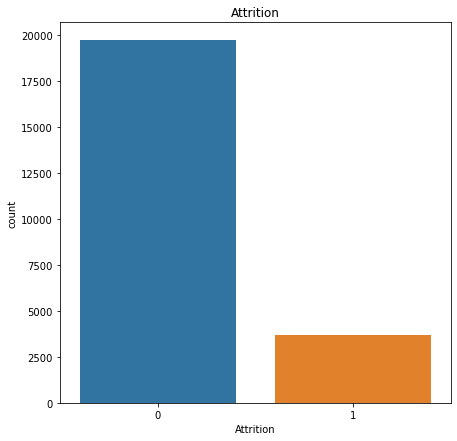

In [130]:
sns.countplot(IBM_training['Attrition'])
fig = plt.gcf()
fig.set_size_inches(7,7) #figure size
plt.title('Attrition')

# 0---> Current employee
# 1--> Voluntary Resignation


# GCF stands for Get Current Figure
# same image as above, resized.
# We used the plt.gcf() function to get a reference to
# the current figure and then called the
# set_size_inches() method on it.

- 0 --> Current employee
- 1 --> Voluntary Resignation

- the Count of Voluntary Resignation employees   <    count of Current Employees

In [131]:
# f,ax = plt.subplots(figsize=(20, 20))
# sns.heatmap(IBM_training.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [132]:
#Dropped Unnecessary Columns from Dataset.
#df=df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

#### <u> AGE</u>

<AxesSubplot:xlabel='Age', ylabel='Density'>

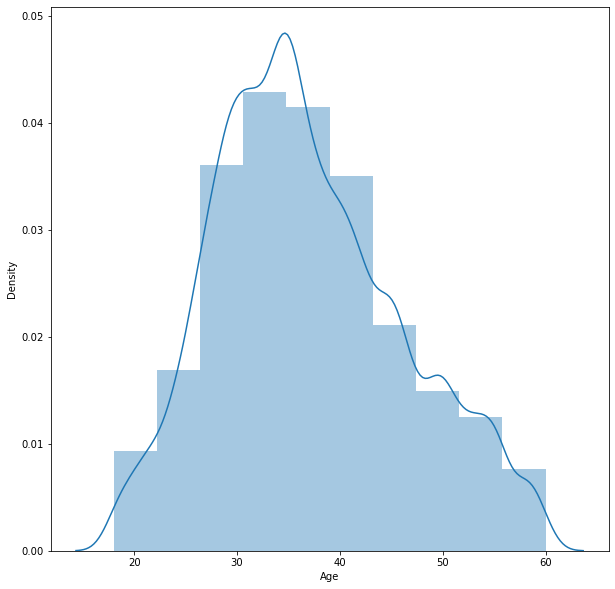

In [133]:
plt.figure(figsize=[10,10])
sns.distplot(IBM_training['Age'],hist=True,kde=True,bins=10)


# hist ----->Whether to plot a (normed) histogram.
# bins ---> Specification of hist bins.
# kde ----> Whether to plot a gaussian kernel density estimate.

- Majority of employees lie between the age range of 30 to 40

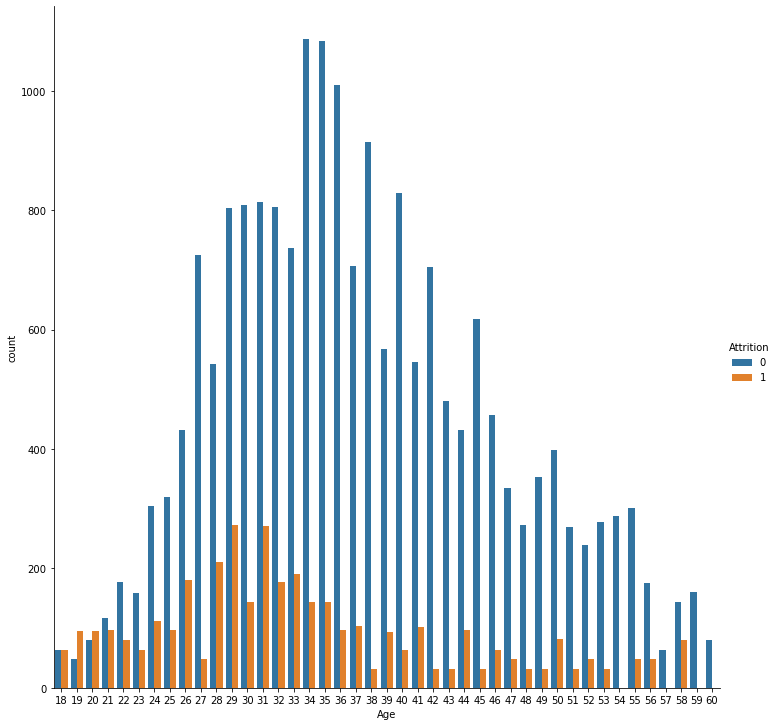

In [134]:
sns.catplot(x='Age',hue='Attrition',data=IBM_training,kind='count',height=10)

- 0---> Current employee
- 1--> Voluntary Resignation


#### <u> BusinessTravel </u>

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

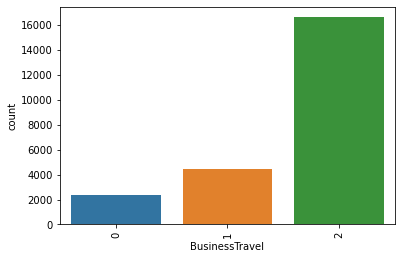

In [135]:
plt.xticks(rotation='vertical')
sns.countplot(IBM_training['BusinessTravel'])


# 0--->Non-Travel
# 1--->Travel-frequently
# 2----> Travel-Rarely

- BusinessTravel We can see that Employees who Travel rarely there count is Higher.

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

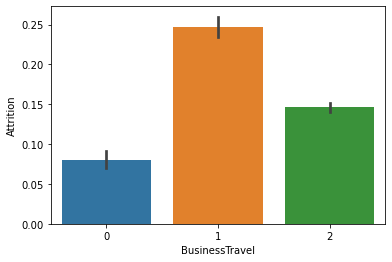

In [136]:
sns.barplot(IBM_training.BusinessTravel,IBM_training.Attrition,data=IBM_training)

- 0--->Non-Travel
- 1--->Travel-frequently
- 2----> Travel-Rarely




- Employees Who travel More there attrition Rate is Higher 

#### <u> GENDER </u>

<AxesSubplot:xlabel='Gender', ylabel='count'>

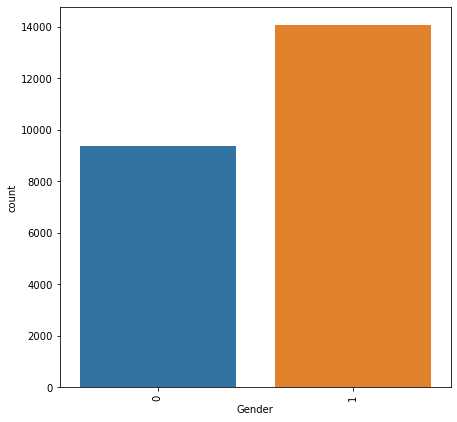

In [137]:
plt.figure(figsize=[7,7])
plt.xticks(rotation='vertical')
sns.countplot(IBM_training['Gender'])


# 0---> Female
# 1---> Male

- 0---> Female
- 1---> Male


- Their are more Male employees than Female employees

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

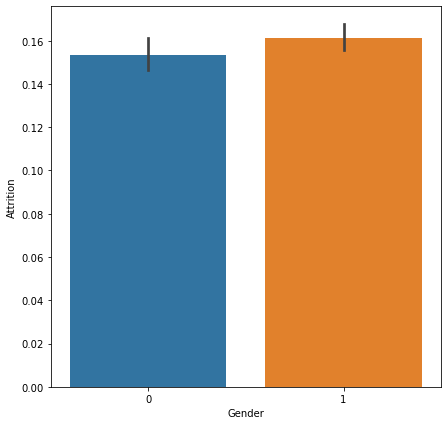

In [138]:
plt.figure(figsize=[7.,7])
sns.barplot(IBM_training.Gender,IBM_training.Attrition,data=IBM_training,hue_order='Attrition')

# 0---> Female
# 1---> Male

- 0---> Female
- 1---> Male


- Attrition of Male employee is higher as Compared to Female employees.

#### <u>MaritalStatus</u>

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

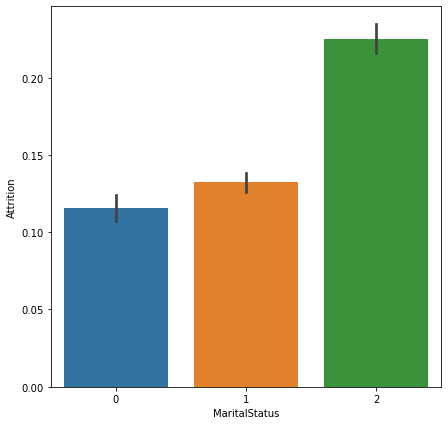

In [139]:
plt.figure(figsize=[7,7])
plt.xticks(rotation=0)
sns.barplot(IBM_training.MaritalStatus,IBM_training.Attrition,data= IBM_training)


#0 ---> Divorced MaritalStatus
#1 ---> Married
#2 ---> single

-                0 ---> Divorced 
-                1 ---> Married
-                2 ---> single



- From Above Bar chart we can see that Employees who are single their Attrition Rate is Higher.

Text(0.5, 1.0, 'OverTime')

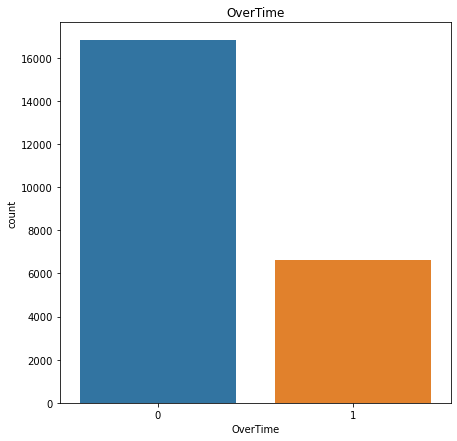

In [140]:
sns.countplot(IBM_training['OverTime'])
fig = plt.gcf()
fig.set_size_inches(7,7) #figure size
plt.title('OverTime')


# 1---> Yes
# 0---> No

<AxesSubplot:xlabel='OverTime', ylabel='Attrition'>

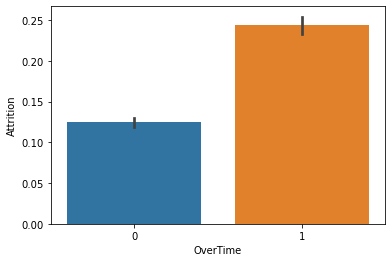

In [141]:
sns.barplot(IBM_training.OverTime,IBM_training.Attrition,data=IBM_training)

# 1---> Yes
# 0---> No

- 1---> Yes
- 0---> No


- From Above Bar chart we can see that Employees who do overtime their Attrition Rate is Higher.

#### <u> EDUCATION FIELD</u>

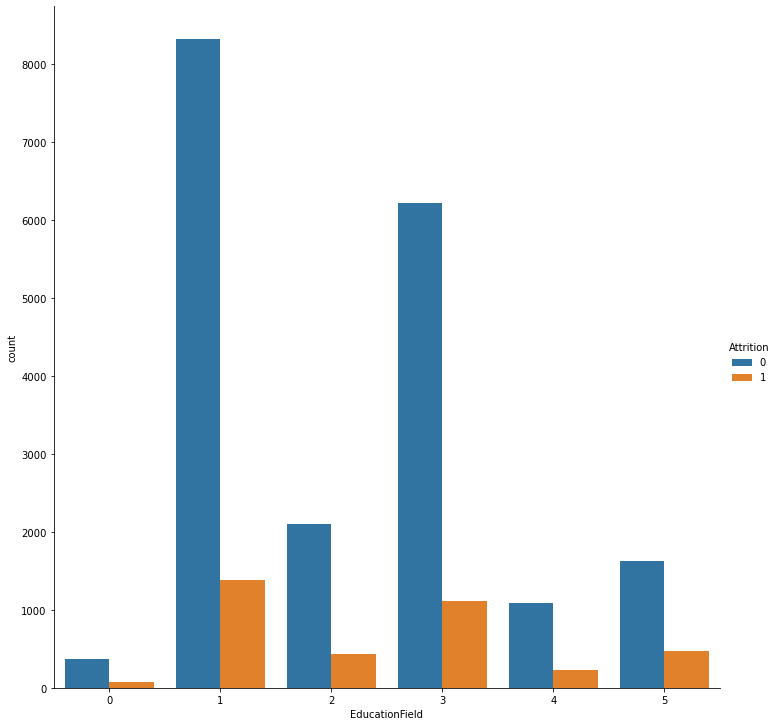

In [142]:
sns.catplot(x='EducationField',hue='Attrition',kind='count',data=IBM_training,height=10)
#sns.catplot(x='EducationField',hue='Attrition',kind='count',data=ibm_df,height=10)
#plt.xticks(rotation=90)

# 0 ---> Human Resources
# 1 ---> Life Sciences
# 2 ---> Marketing
# 3 ---> Medical
# 4 ---> Other
# 5 ---> Technical Degree



- 0 ---> Human Resources
- 1 ---> Life Sciences
- 2 ---> Marketing
- 3 ---> Medical
- 4 ---> Other
- 5 ---> Technical Degree



- Employees from Life Sciences Education field have highest Attrition rate

#### <u> DEPARTMENT </u>

<AxesSubplot:xlabel='Department', ylabel='count'>

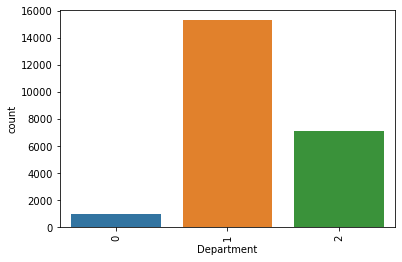

In [143]:
plt.xticks(rotation='vertical')
sns.countplot(IBM_training['Department'])


# 0 -----> Human Resource
# 1 -----> Research and development
# 2 -----> Sales

- Research and development Departments has Maximum Number of Employees.

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

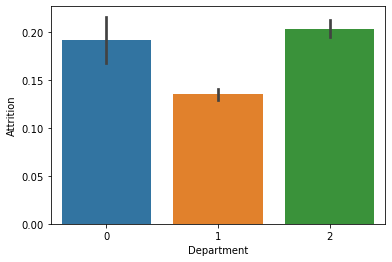

In [144]:
sns.barplot(IBM_training.Department,IBM_training.Attrition,data=IBM_training)


- 0 -----> Human Resource
- 1 -----> Research and development
- 2 -----> Sales


- Sales Department Employees Attrition Rate is Higher.

#### <u> JobRole </u>

<AxesSubplot:ylabel='count'>

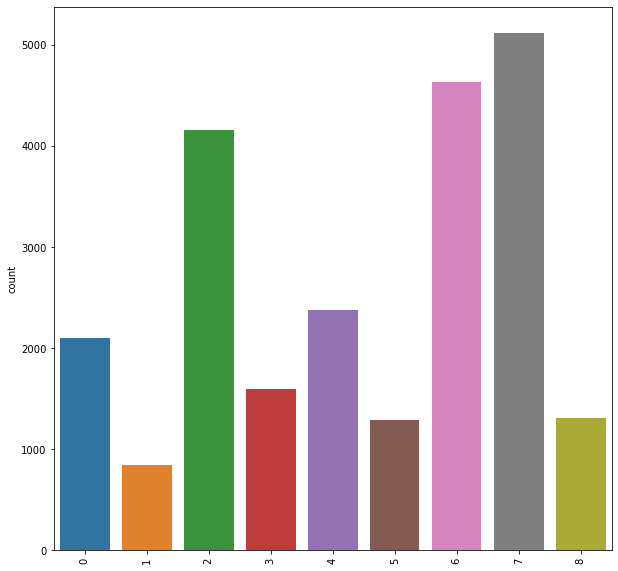

In [145]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(IBM_training['JobRole']))



# 0 -----> Healthcare Representative
# 1 -----> Human resources
# 2 -----> Laboratory Technician
# 3 -----> Manager
# 4 -----> Manufacturing director
# 5 -----> Research director
# 6 -----> Research Scientist
# 7 -----> Sales executive
# 8 -----> Sales Representative

<AxesSubplot:xlabel='JobRole', ylabel='Attrition'>

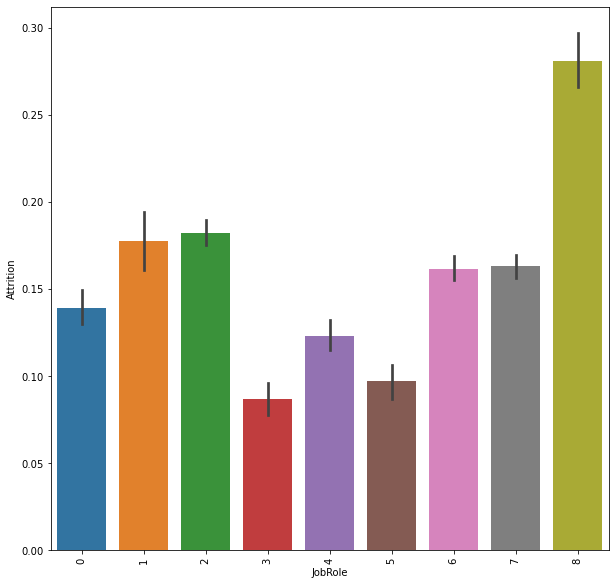

In [146]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.barplot(IBM_training.JobRole,IBM_training.Attrition,data= IBM_training,ci=80,hue_order='attrition')

- 0 -----> Healthcare Representative
- 1 -----> Human resources
- 2 -----> Laboratory Technician
- 3 -----> Manager
- 4 -----> Manufacturing director
- 5 -----> Research director
- 6 -----> Research Scientist
- 7 -----> Sales executive
- 8 -----> Sales Representative



- Here above we can see that Attrion of SalesRepresntative Is Much Higher.

<AxesSubplot:>

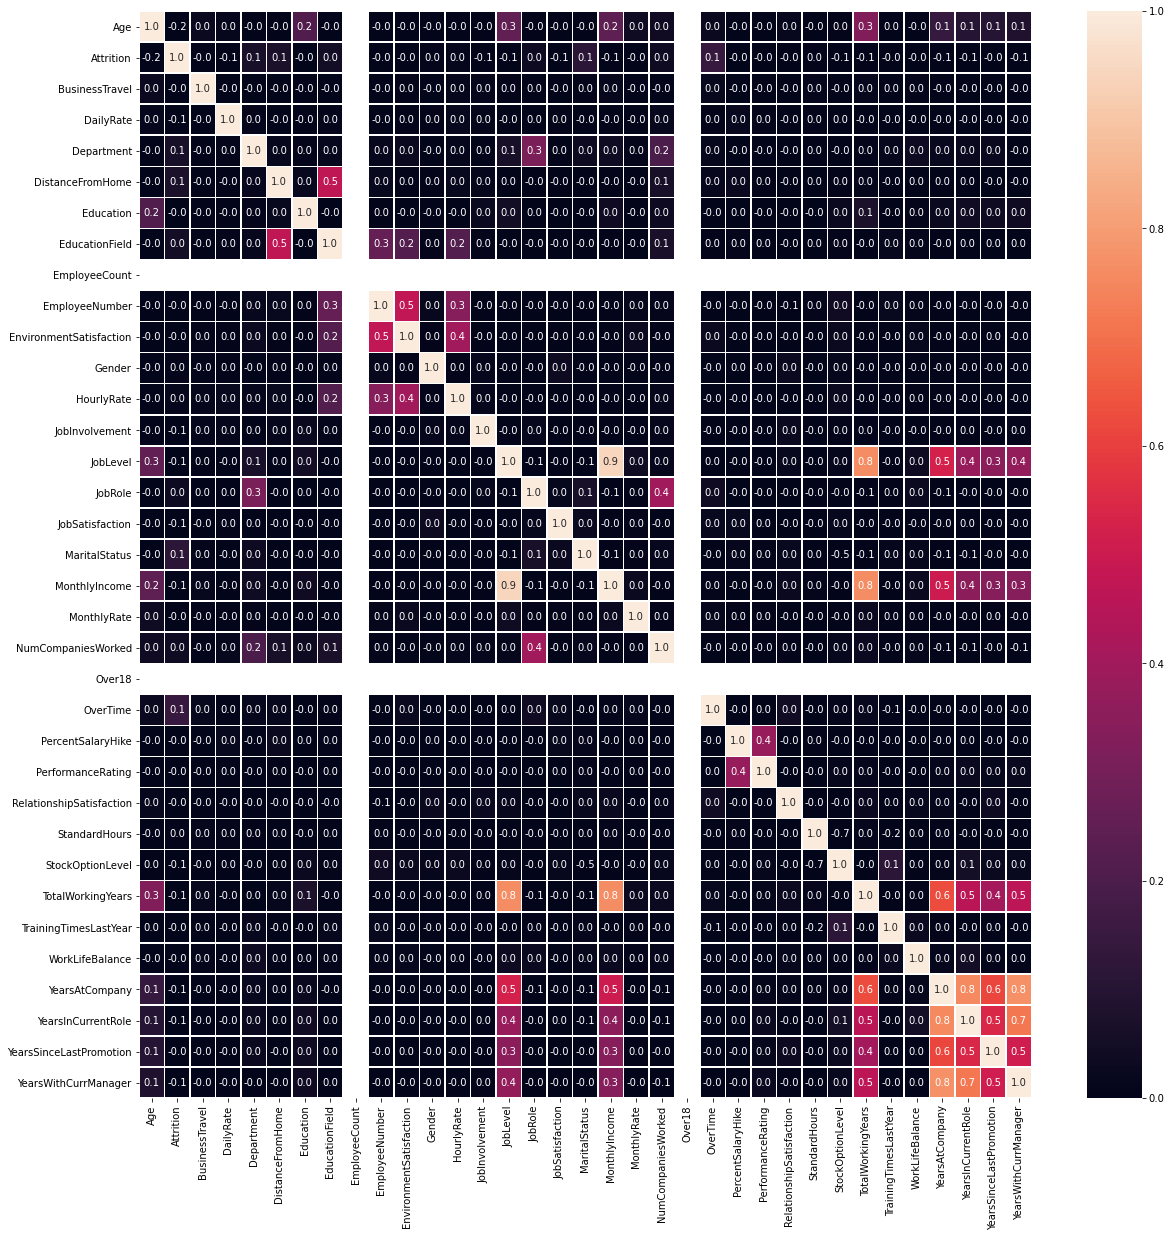

In [147]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(IBM_training.corr(), annot=True,vmin=0, vmax=1, linewidths=.5, fmt= '.1f',ax=ax)

- If we see the correlation metrix of both IBM_training File Over18,Employeecount,and has NO correlation with any variable


In [148]:
#Dropped Unnecessary Columns from Dataset.

IBM_training=IBM_training.drop(['Over18','EmployeeNumber','EmployeeCount'],axis=1)

In [149]:
IBM_training.shape

(23436, 32)

In [150]:
IBM_testing=IBM_testing.drop(['Over18','EmployeeNumber','EmployeeCount'],axis=1)

In [151]:
IBM_testing.shape

(1470, 32)

In [152]:
IBM_training.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
1,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5
2,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
3,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5
4,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
5,41,1,2,1102,2,1,2,1,4,0,33,3,4,3,3,0,14756,19730,2,1,14,3,3,80,3,21,2,3,5,0,0,2
6,41,1,2,1102,2,1,2,1,1,0,41,3,5,3,1,1,19566,3854,5,0,11,3,4,80,0,33,5,1,29,8,11,10
7,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5
8,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
9,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5


#### <u> separating the target variable from training and testing data file </u>

In [153]:
# separating the target variable from training data file

IBM_training_Y = IBM_training['Attrition']
IBM_training.drop(['Attrition'], axis = 1, inplace = True)

In [154]:
#Adding dependent variable at the end 
IBM_training['Attrition']= IBM_training_Y 

In [155]:
IBM_training.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5,1
2,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5,1
3,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5,1
4,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5,1
5,41,2,1102,2,1,2,1,4,0,33,3,4,3,3,0,14756,19730,2,1,14,3,3,80,3,21,2,3,5,0,0,2,1
6,41,2,1102,2,1,2,1,1,0,41,3,5,3,1,1,19566,3854,5,0,11,3,4,80,0,33,5,1,29,8,11,10,1
7,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5,1
8,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5,1
9,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5,1


### <u>Splitting the IBM_training data into X and Y</u>

In [156]:
# now we split Ibm_training file data into train and test

X = IBM_training.iloc[:,0:-1]
Y = IBM_training.iloc[:,-1]
Y=  Y.astype(int)

### <u>Scaling the Data</u>

In [157]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
1,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5
2,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5
3,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,4,1,11,3,1,80,0,8,0,1,6,4,0,5
4,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,7,1,11,3,1,80,0,8,0,1,6,4,0,5


In [158]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [159]:
X

array([[ 0.44472761,  0.59007565,  0.74466727, ..., -0.06268525,
        -0.67864354,  0.24426575],
       [ 0.44472761,  0.59007565,  0.74466727, ..., -0.06268525,
        -0.67864354,  0.24426575],
       [ 0.44472761,  0.59007565,  0.74466727, ..., -0.06268525,
        -0.67864354,  0.24426575],
       ...,
       [ 0.00693048, -0.91258793,  0.51395204, ..., -0.89003174,
        -0.05709952, -0.59565387],
       [ 0.00693048,  0.59007565,  1.36983112, ...,  1.59200773,
         0.87521651,  1.08418538],
       [ 0.00693048, -2.41525151,  0.84389963, ..., -0.61424958,
        -0.05709952, -0.59565387]])

In [160]:
# Splitting the data in 80:20
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)   

In [161]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18748, 31)
(4688, 31)
(18748,)
(4688,)


## <u> Model Building </u>

### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [163]:
#print(list(zip(Y_test,Y_pred)))


In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc) 
#627

[[3955   25]
 [ 661   47]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3980
           1       0.65      0.07      0.12       708

    accuracy                           0.85      4688
   macro avg       0.75      0.53      0.52      4688
weighted avg       0.83      0.85      0.80      4688

Accuracy of the model:  0.8536689419795221


**Adjusting the threshold**

In [165]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.88940423 0.11059577]
 [0.90707504 0.09292496]
 [0.64112306 0.35887694]
 ...
 [0.93278552 0.06721448]
 [0.89928477 0.10071523]
 [0.95288535 0.04711465]]


In [166]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.48:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

#629

[[3950   30]
 [ 654   54]]
Accuracy of the model:  0.8540955631399317
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3980
           1       0.64      0.08      0.14       708

    accuracy                           0.85      4688
   macro avg       0.75      0.53      0.53      4688
weighted avg       0.83      0.85      0.80      4688



In [168]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 711  , type 2 error : 597  , type 1 error: 114
Errors at threshold  0.41000000000000003 : 708  , type 2 error : 608  , type 1 error: 100
Errors at threshold  0.42000000000000004 : 703  , type 2 error : 613  , type 1 error: 90
Errors at threshold  0.43000000000000005 : 695  , type 2 error : 620  , type 1 error: 75
Errors at threshold  0.44000000000000006 : 692  , type 2 error : 630  , type 1 error: 62
Errors at threshold  0.45000000000000007 : 688  , type 2 error : 636  , type 1 error: 52
Errors at threshold  0.4600000000000001 : 686  , type 2 error : 640  , type 1 error: 46
Errors at threshold  0.4700000000000001 : 685  , type 2 error : 646  , type 1 error: 39
Errors at threshold  0.4800000000000001 : 684  , type 2 error : 654  , type 1 error: 30
Errors at threshold  0.4900000000000001 : 684  , type 2 error : 657  , type 1 error: 27
Errors at threshold  0.5000000000000001 : 686  , type 2 error : 661  , type 1 error: 25
Errors at threshold  0.5100000000000001 

In [169]:
# SGD

from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                         eta0=0.000001,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

#637

[[3917   63]
 [ 642   66]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3980
           1       0.51      0.09      0.16       708

    accuracy                           0.85      4688
   macro avg       0.69      0.54      0.54      4688
weighted avg       0.81      0.85      0.80      4688

Accuracy of the model:  0.8496160409556314


In [171]:
# #Using cross validation

# classifier=LogisticRegression()

# #performing kfold_cross_validation
# from sklearn.model_selection import KFold
# kfold_cv=KFold(n_splits=10)
# #print(kfold_cv)

# from sklearn.model_selection import cross_val_score
# #running the model using scoring metric as accuracy
# kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
#                                                  y=Y_train, cv=kfold_cv)
# print(kfold_cv_result)
# #finding the mean
# print(kfold_cv_result.mean())


In [172]:
#model tuning

# for train_value, test_value in kfold_cv.split(X_train):
#     classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
# Y_pred=classifier.predict(X_test)

In [173]:
# from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)
# print()


# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)


### KNN

In [174]:
np.sqrt(len(X_train))

136.92333621410194

In [175]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=125,metric="manhattan")

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

#print(list(zip(Y_test,Y_pred)))


In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

#here is code take that fron logestic file
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


[[3975    5]
 [ 699    9]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3980
           1       0.64      0.01      0.02       708

    accuracy                           0.85      4688
   macro avg       0.75      0.51      0.47      4688
weighted avg       0.82      0.85      0.78      4688

Accuracy of the model:  0.8498293515358362


In [177]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=3,metric="manhattan")

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)


In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

#here is code take that fron logestic file
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[3975    5]
 [  10  698]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       0.99      0.99      0.99       708

    accuracy                           1.00      4688
   macro avg       1.00      0.99      0.99      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.9968003412969283


In [179]:
# from sklearn.metrics import accuracy_score
# my_dict={}
# for K in range(1,21):
#     model_KNN = KNeighborsClassifier(n_neighbors=K,metric="manhattan")
#     model_KNN.fit(X_train, Y_train)
#     Y_pred = model_KNN.predict(X_test)
#     print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
#     my_dict[K]=accuracy_score(Y_test,Y_pred)

In [180]:
# '''model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
# Accuracy is  0.9962729357798165 for K-Value: 1
# Accuracy is  0.9942660550458715 for K-Value: 2
# Accuracy is  0.9931192660550459 for K-Value: 3
# Accuracy is  0.9922591743119266 for K-Value: 4
# Accuracy is  0.992545871559633 for K-Value: 5
# Accuracy is  0.9859518348623854 for K-Value: 6
# Accuracy is  0.9833715596330275 for K-Value: 7
# Accuracy is  0.9704701834862385 for K-Value: 8
# Accuracy is  0.9638761467889908 for K-Value: 9
# Accuracy is  0.9343463302752294 for K-Value: 10
# Accuracy is  0.9165711009174312 for K-Value: 11
# Accuracy is  0.8830275229357798 for K-Value: 12
# Accuracy is  0.8741399082568807 for K-Value: 13
# Accuracy is  0.8598050458715596 for K-Value: 14
# Accuracy is  0.8583715596330275 for K-Value: 15
# Accuracy is  0.8595183486238532 for K-Value: 16
# Accuracy is  0.8583715596330275 for K-Value: 17
# Accuracy is  0.8497706422018348 for K-Value: 18
# Accuracy is  0.8532110091743119 for K-Value: 19
# Accuracy is  0.8494839449541285 for K-Value: 20
# Accuracy is  0.8509174311926605 for K-Value: 21
# Accuracy is  0.8489105504587156 for K-Value: 22
# Accuracy is  0.8500573394495413 for K-Value: 23
# Accuracy is  0.8434633027522935 for K-Value: 24
# Accuracy is  0.8423165137614679 for K-Value: 25
# Accuracy is  0.838302752293578 for K-Value: 26
# Accuracy is  0.8380160550458715 for K-Value: 27
# Accuracy is  0.8357224770642202 for K-Value: 28
# Accuracy is  0.8391628440366973 for K-Value: 29
# Accuracy is  0.8365825688073395 for K-Value: 30
# Accuracy is  0.8374426605504587 for K-Value: 31
# Accuracy is  0.8334288990825688 for K-Value: 32
# Accuracy is  0.8348623853211009 for K-Value: 33
# Accuracy is  0.832855504587156 for K-Value: 34
# Accuracy is  0.8340022935779816 for K-Value: 35
# Accuracy is  0.8311353211009175 for K-Value: 36
# Accuracy is  0.8297018348623854 for K-Value: 37
# Accuracy is  0.8285550458715596 for K-Value: 38
# Accuracy is  0.8297018348623854 for K-Value: 39
# Accuracy is  0.8297018348623854 for K-Value: 40
# Accuracy is  0.830848623853211 for K-Value: 41
# Accuracy is  0.8291284403669725 for K-Value: 42
# Accuracy is  0.8294151376146789 for K-Value: 43
# Accuracy is  0.8274082568807339 for K-Value: 44
# Accuracy is  0.8291284403669725 for K-Value: 45
# Accuracy is  0.8251146788990825 for K-Value: 46
# Accuracy is  0.8271215596330275 for K-Value: 47
# Accuracy is  0.825401376146789 for K-Value: 48
# Accuracy is  0.8259747706422018 for K-Value: 49
# Accuracy is  0.8245412844036697 for K-Value: 50
# Accuracy is  0.8251146788990825 for K-Value: 51
# Accuracy is  0.8239678899082569 for K-Value: 52
# Accuracy is  0.8262614678899083 for K-Value: 53
# Accuracy is  0.8242545871559633 for K-Value: 54
# Accuracy is  0.8231077981651376 for K-Value: 55
# Accuracy is  0.8216743119266054 for K-Value: 56
# Accuracy is  0.8219610091743119 for K-Value: 57
# Accuracy is  0.8231077981651376 for K-Value: 58
# Accuracy is  0.8222477064220184 for K-Value: 59
# Accuracy is  0.8236811926605505 for K-Value: 60
# Accuracy is  0.8236811926605505 for K-Value: 61
# Accuracy is  0.8239678899082569 for K-Value: 62
# Accuracy is  0.8239678899082569 for K-Value: 63
# Accuracy is  0.8239678899082569 for K-Value: 64
# Accuracy is  0.8236811926605505 for K-Value: 65
# Accuracy is  0.8242545871559633 for K-Value: 66
# Accuracy is  0.8242545871559633 for K-Value: 67
# Accuracy is  0.8242545871559633 for K-Value: 68
# Accuracy is  0.8239678899082569 for K-Value: 69
# Accuracy is  0.8239678899082569 for K-Value: 70
# Accuracy is  0.8236811926605505 for K-Value: 71
# Accuracy is  0.823394495412844 for K-Value: 72
# Accuracy is  0.823394495412844 for K-Value: 73
# Accuracy is  0.823394495412844 for K-Value: 74
# Accuracy is  0.823394495412844 for K-Value: 75
# Accuracy is  0.8228211009174312 for K-Value: 76
# Accuracy is  0.8222477064220184 for K-Value: 77
# Accuracy is  0.8213876146788991 for K-Value: 78
# Accuracy is  0.8213876146788991 for K-Value: 79
# Accuracy is  0.8205275229357798 for K-Value: 80
# Accuracy is  0.8205275229357798 for K-Value: 81
# Accuracy is  0.8208142201834863 for K-Value: 82
# Accuracy is  0.8205275229357798 for K-Value: 83
# Accuracy is  0.8202408256880734 for K-Value: 84
# Accuracy is  0.819954128440367 for K-Value: 85
# Accuracy is  0.8193807339449541 for K-Value: 86
# Accuracy is  0.8193807339449541 for K-Value: 87
# Accuracy is  0.8202408256880734 for K-Value: 88
# Accuracy is  0.8213876146788991 for K-Value: 89
# Accuracy is  0.8205275229357798 for K-Value: 90
# Accuracy is  0.8205275229357798 for K-Value: 91
# Accuracy is  0.8208142201834863 for K-Value: 92
# Accuracy is  0.8208142201834863 for K-Value: 93
# Accuracy is  0.8211009174311926 for K-Value: 94
# Accuracy is  0.8211009174311926 for K-Value: 95
# Accuracy is  0.8216743119266054 for K-Value: 96
# Accuracy is  0.8225344036697247 for K-Value: 97
# Accuracy is  0.8219610091743119 for K-Value: 98
# Accuracy is  0.8219610091743119 for K-Value: 99
# Accuracy is  0.8213876146788991 for K-Value: 100
# Accuracy is  0.8213876146788991 for K-Value: 101
# Accuracy is  0.8216743119266054 for K-Value: 102
# Accuracy is  0.8213876146788991 for K-Value: 103
# Accuracy is  0.8213876146788991 for K-Value: 104
# Accuracy is  0.8213876146788991 for K-Value: 105
# Accuracy is  0.8205275229357798 for K-Value: 106
# Accuracy is  0.8205275229357798 for K-Value: 107
# Accuracy is  0.8205275229357798 for K-Value: 108
# Accuracy is  0.8205275229357798 for K-Value: 109
# Accuracy is  0.8208142201834863 for K-Value: 110
# Accuracy is  0.8205275229357798 for K-Value: 111
# Accuracy is  0.8202408256880734 for K-Value: 112
# Accuracy is  0.8202408256880734 for K-Value: 113
# Accuracy is  0.8202408256880734 for K-Value: 114
# Accuracy is  0.8196674311926605 for K-Value: 115
# Accuracy is  0.8193807339449541 for K-Value: 116
# Accuracy is  0.819954128440367 for K-Value: 117
# Accuracy is  0.8193807339449541 for K-Value: 118
# ​
# '''

In [181]:
#self testing

In [182]:
#now if we want to predict by just any values 
row={'Age':41,'BusinessTravel':2,'DailyRate':1102,'Department':2,'DistanceFromHome':1,'Education':2 ,'EnvironmentSatisfaction':2,'Gender':0,'EducationField':1,'HourlyRate':94,'JobInvolvement':3,'JobLevel':2,'JobRole':7,'JobSatisfaction':4,'MaritalStatus':2,'MonthlyIncome':5993,'MonthlyRate':19479,'NumCompaniesWorked':8,'OverTime':1,'PercentSalaryHike':11,'PerformanceRating':3,'RelationshipSatisfaction':1,'StockOptionLevel':0,'TotalWorkingYears':8,'TrainingTimesLastYear':0,'WorkLifeBalance':1,'YearsAtCompany':6,'YearsInCurrentRole':4,'YearsSinceLastPromotion':0,'YearsWithCurrManager':5,'Employee Source':7}

#convert into datframe
test_data=pd.DataFrame(data=row,index=[0])
test_data

# we need to scale the data
# without these it give wrong value
test_data=scaler.transform(test_data)
test_data

array([[ 4.44727605e-01,  5.90075651e-01,  7.44667268e-01,
         1.39919259e+00, -1.00876149e+00, -8.88202563e-01,
        -1.80299715e-01, -2.48219554e+00,  8.16032135e-01,
         1.38263576e+00,  6.25560518e-01, -5.79100656e-02,
         1.04134589e+00,  1.15575840e+00,  1.23575558e+00,
        -1.08792975e-01,  7.28740912e-01,  2.38678791e+00,
         1.59144911e+00, -1.15121072e+00, -4.28458384e-01,
        -1.58675345e+00, -1.13195487e+02,  6.41591584e+00,
        -1.44888780e+00, -1.37613919e+00,  4.58887859e+00,
        -4.90646301e-01, -1.16581391e+00,  8.75216513e-01,
         8.04212168e-01]])

In [183]:
#check the result

Y_pred_temp=model_KNN.predict(test_data)# this model_KNN # this we cretated an d train ao we directly use here for checking
Y_pred_temp

#output 1 means it is Voluntary Resignation 

array([1])

### Decision Tree

In [184]:
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
print(Y_pred)


[0 0 1 ... 0 0 1]


In [185]:
#print(list(zip(Y_test,Y_pred)))

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[3962   18]
 [   7  701]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       0.97      0.99      0.98       708

    accuracy                           0.99      4688
   macro avg       0.99      0.99      0.99      4688
weighted avg       0.99      0.99      0.99      4688

Accuracy of the model:  0.9946672354948806


<u> lets see the feature importance </u>


In [187]:
#print(list(zip(IBM_training.columns,model_DT.feature_importances_)))

In [188]:
#Pruning

In [189]:
# from sklearn.tree import DecisionTreeClassifier

# model_DT=DecisionTreeClassifier(criterion="gini",random_state=10,min_samples_leaf=5,max_depth=10)

# model_DT.fit(X_train,Y_train)
# Y_pred=model_DT.predict(X_test)
#print(list(zip(Y_test,Y_pred)))



In [190]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)

In [191]:
# we can see that the acuuracy is affected bcz we did unnecessary pruning
# purning only do only when your tree is overfitting

In [192]:
# ensemble techniques

In [193]:
# bagging

In [194]:
# ExtratreeClassifier

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=50, random_state=10)
## no. of decison tree you want= n_estimators

#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[3979    1]
 [   9  699]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       1.00      0.99      0.99       708

    accuracy                           1.00      4688
   macro avg       1.00      0.99      1.00      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.9978668941979523


In [197]:
# random forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier(n_estimators=50, random_state=10)
## no. of decison tree you want= n_estimators

#fit the model on the data and predict the values
model_RF.fit(X_train,Y_train)

Y_pred=model_RF.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[3978    2]
 [   7  701]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       1.00      0.99      0.99       708

    accuracy                           1.00      4688
   macro avg       1.00      0.99      1.00      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.998080204778157


In [200]:
#boosting

In [201]:
#adaptive boosting

In [202]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                    n_estimators=50,
                                    random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[3962   18]
 [   5  703]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       0.98      0.99      0.98       708

    accuracy                           1.00      4688
   macro avg       0.99      0.99      0.99      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.9950938566552902


In [204]:
# gradient booster

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=250,random_state=10)
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[3963   17]
 [ 365  343]]

Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      3980
           1       0.95      0.48      0.64       708

    accuracy                           0.92      4688
   macro avg       0.93      0.74      0.80      4688
weighted avg       0.92      0.92      0.91      4688

Accuracy of the model:  0.9185153583617748


In [207]:
# XGBooster

In [208]:
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

[20:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[3979    1]
 [   5  703]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       1.00      0.99      1.00       708

    accuracy                           1.00      4688
   macro avg       1.00      1.00      1.00      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.9987201365187713


### SVC

In [210]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=8,gamma=0.1)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
#print(list(Y_pred))


In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[3978    2]
 [  15  693]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3980
           1       1.00      0.98      0.99       708

    accuracy                           1.00      4688
   macro avg       1.00      0.99      0.99      4688
weighted avg       1.00      1.00      1.00      4688

Accuracy of the model:  0.9963737201365188


In [212]:
# from sklearn import svm

# svc_model = svm.SVC(kernel="rbf")# in () what ever we want to constant we put here
# # means we want kernel rgf only no change in kernal we pass here in() so u go do with others if u want to make them constant

# parameter_space = {
#     #'kernel': ["linear","rbf","poly","sigmoid"],
#     'gamma': [0.1,0.01,0.001],
#     'C': [1,5,8,10,20]
# }
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)


In [213]:
# clf.fit(X_train,Y_train)

# GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
#              param_grid={'C': [1, 5, 8, 10, 20], 'gamma': [0.1, 0.01, 0.001]})

In [214]:
# print('Best parameters found:\n', clf.best_params_)

# Best parameters found:
#  {'C': 8, 'gamma': 0.1}

In [215]:
#voting classifier

In [216]:
# #from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier
# #from sklearn.neighbors import KNeighborsClassifier

# # create the sub models
# estimators = []#all models data come here in list
# #model1 = LogisticRegression()
# #estimators.append(('log', model1))#log is model name, model1 is object of log
# model2 = DecisionTreeClassifier(criterion='gini',random_state=10)#basic DT not tuneed one
# estimators.append(('cart', model2))#same cart is model and model12 is object
# model3 = SVC(kernel="rbf", C=100,gamma=0.1)#here we use tunned SVM not base SVM
# estimators.append(('svm', model3))
# #model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')#tunned one
# #estimators.append(('knn', model4))


# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# ensemble.fit(X_train,Y_train)
# Y_pred=ensemble.predict(X_test)
# #print(Y_pred)

In [217]:
# from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
# confusion_matrix=confusion_matrix(Y_test,Y_pred)
# print(confusion_matrix)
# print()

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test,Y_pred)
# print("Accuracy of the model: ",acc)

In [218]:
#svc ,DT = 14 error 9963
# DT,KNN = 23 error 9940
# svc , knn = 23 error  99940

### Model building on  Testing data

In [219]:
#IBM_testing_final

In [220]:
IBM_testing_Y = IBM_testing['Attrition']
IBM_testing_Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [221]:
IBM_testing.drop(['Attrition'], axis = 1, inplace = True)

In [222]:
IBM_testing.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0


In [223]:
test=IBM_testing.values
test=scaler.transform(test)
test

array([[ 0.44472761,  0.59007565,  0.74466727, ..., -0.06268525,
        -0.67864354,  0.24426575],
       [ 1.32032186, -0.91258793, -1.2970385 , ...,  0.76466124,
        -0.36787153,  0.80421217],
       [ 0.00693048,  0.59007565,  1.41696649, ..., -1.16581391,
        -0.67864354, -1.15560029],
       ...,
       [-1.08756233,  0.59007565, -1.60465881, ..., -0.61424958,
        -0.67864354, -0.31568066],
       [ 1.32032186, -0.91258793,  0.54868336, ...,  0.48887907,
        -0.67864354,  1.08418538],
       [-0.32141736,  0.59007565, -0.43123617, ..., -0.33846742,
        -0.36787153, -0.59565387]])

In [224]:
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=10)

In [225]:
test_pred_new=model_DT.predict(test)
test_pred_new

array([1, 0, 1, ..., 0, 0, 0])

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

#here is code take that fron logestic file
confusion_matrix=confusion_matrix(IBM_testing_Y,test_pred_new)
print(confusion_matrix)
print()
print(accuracy_score(IBM_testing_Y,test_pred_new))
print("Classification report: ")

print(classification_report(IBM_testing_Y,test_pred_new))

[[1230    3]
 [   8  229]]

0.992517006802721
Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1233
           1       0.99      0.97      0.98       237

    accuracy                           0.99      1470
   macro avg       0.99      0.98      0.99      1470
weighted avg       0.99      0.99      0.99      1470



In [227]:
## K- Fold

In [228]:
# #Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.86613333 0.84746667 0.83573333 0.85333333 0.8512     0.83786667
 0.8352     0.83626667 0.84364995 0.84738527]
0.8454235218783351


In [229]:
# accuracy for Original model of DT is 0.9945987654320988

model_DT=DecisionTreeClassifier()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model_DT,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.99466667 0.99626667 0.99466667 0.99573333 0.99253333 0.99626667
 0.99626667 0.99413333 0.99466382 0.99573106]
0.9950928210601209
